<a href="https://colab.research.google.com/github/lafrith/Sample_project/blob/main/Machine_Learning_Practice_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dansbecker_melbourne_housing_snapshot_path = kagglehub.dataset_download('dansbecker/melbourne-housing-snapshot')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


In [3]:
melbourne_data = pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')
melbourne_data.describe()
melbourne_data.shape

(13580, 21)

In [4]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
melbourne_data=melbourne_data.dropna(axis=0)

In [6]:
melbourne_data.shape

(6196, 21)

In [7]:
y=melbourne_data.Price

In [8]:
melbourne_features=['Rooms','Bathroom','Landsize','Lattitude','Longtitude']

In [9]:
X=melbourne_data[melbourne_features]

In [10]:
X.describe()
X.shape

(6196, 5)

In [11]:
X.head(1)

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934


# Decision Tree Model

In [12]:
from sklearn.tree import DecisionTreeRegressor

melbourne_model=DecisionTreeRegressor(random_state=1)

melbourne_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [13]:
print('Making predictions for the following 5 houses: ')
print(X.head())
print('The predictions are: ')
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses: 
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are: 
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [14]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices=melbourne_model.predict(X)
mean_absolute_error(y,predicted_home_prices)

1115.7467183128902

In [15]:
from sklearn.model_selection import train_test_split

train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=0)
melbourne_model=DecisionTreeRegressor()
melbourne_model.fit(train_X,train_y)

val_predictions=melbourne_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))

273806.69033785234


In [16]:
def get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y):
    model=DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
    model.fit(train_X,train_y)
    preds_val=model.predict(val_X)
    mae=mean_absolute_error(val_y,preds_val)
    return(mae)

In [17]:
for max_leaf_nodes in [5,50,500,5000]:
    my_mae=get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y)
    print(f"Max leaf nodes: {max_leaf_nodes} \t Mean Absolute Error: {my_mae}")

Max leaf nodes: 5 	 Mean Absolute Error: 385696.54278937966
Max leaf nodes: 50 	 Mean Absolute Error: 279794.61143891385
Max leaf nodes: 500 	 Mean Absolute Error: 261718.1134423186
Max leaf nodes: 5000 	 Mean Absolute Error: 271320.97310092533


In [18]:
m_leaf_node_values=[]
mae_values=[]
for max_leaf_nodes in range(100,1000,10):
    my_mae=get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y)
    m_leaf_node_values.append(max_leaf_nodes)
    mae_values.append(my_mae)

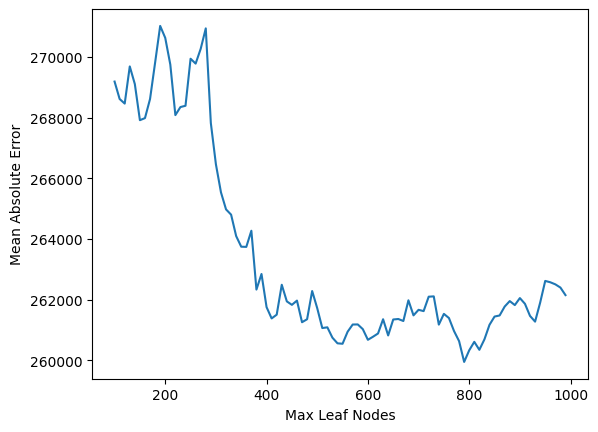

In [19]:
import matplotlib.pyplot as plt

plt.plot(m_leaf_node_values,mae_values,label="Mean Absolute Error")

plt.xlabel('Max Leaf Nodes')
plt.ylabel('Mean Absolute Error')
plt.show()

In [20]:
import pandas as pd
mae_values=pd.Series(dtype=float)
for max_leaf_nodes in range(100,1000,10):
    my_mae=get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y)
    mae_values[max_leaf_nodes]=my_mae
mae_values.head(10)

,0
100,269191.989430
110,268617.167455
120,268465.965204
130,269691.372963
140,269108.760092
150,267918.420010
160,267987.022747
170,268616.581243
180,269814.870177
190,271027.067674


<Axes: >

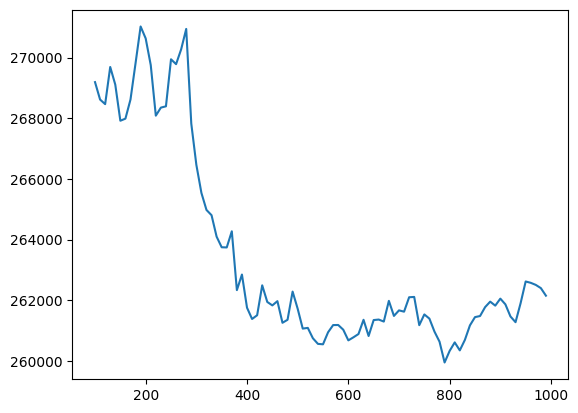

In [21]:
mae_values.plot()

# Random Forest model - Missing Values

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_model=RandomForestRegressor(random_state=1)
forest_model.fit(train_X,train_y)
preds=forest_model.predict(val_X)
print(mean_absolute_error(val_y,preds))

207190.6873773146


In [23]:
melb_predictors=melbourne_data.drop(['Price'],axis=1)
X=melb_predictors.select_dtypes(exclude=['object'])
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [24]:
def score_dataset(X_train,X_valid,y_train,y_valid):
    model=RandomForestRegressor(n_estimators=10,random_state=0)
    model.fit(X_train,y_train)
    preds=model.predict(X_valid)
    return mean_absolute_error(y_valid,preds)

In [25]:
cols_with_missing=[col for col in X_train.columns if X_train[col].isnull().any()]

reduced_X_train=X_train.drop(cols_with_missing,axis=1)
reduced_X_valid=X_valid.drop(cols_with_missing,axis=1)

print(f"MAE from Approach 1 (Dropping cols with missing value(s)): {score_dataset(reduced_X_train,reduced_X_valid,y_train,y_valid)}")

MAE from Approach 1 (Dropping cols with missing value(s)): 192784.52193548388


In [26]:
from sklearn.impute import SimpleImputer

my_imputer=SimpleImputer()
imputed_X_train=pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid=pd.DataFrame(my_imputer.transform(X_valid))

imputed_X_train.columns=X_train.columns
imputed_X_valid.columns=X_valid.columns

print(f"MAE from approach 2 (Imputing - mean value - missing values): {score_dataset(imputed_X_train,imputed_X_valid,y_train,y_valid)}")


MAE from approach 2 (Imputing - mean value - missing values): 192784.52193548388


In [27]:
X_train_plus=X_train.copy()
X_valid_plus=X_valid.copy()

for col in cols_with_missing:
    X_train_plus[col+'_was_missing']=X_train_plus[col].isnull()
    X_valid_plus[col+'_was_missing']=X_valid_plus[col].isnull()

my_imputer=SimpleImputer()
imputed_X_train_plus=pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus=pd.DataFrame(my_imputer.transform(X_valid_plus))

imputed_X_train_plus.columns=X_train_plus.columns
imputed_X_valid_plus.columns=X_valid_plus.columns

print(f"MAE from approach 3 (Imputed value flags): {score_dataset(imputed_X_train_plus,imputed_X_valid_plus,y_train,y_valid)}")

MAE from approach 3 (Imputed value flags): 192784.52193548388


In [28]:
print(cols_with_missing)

[]


In [29]:
print(X_train.shape)

(4956, 12)


In [30]:
melbourne_data.shape

(6196, 21)

In [31]:
melb_data=pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')


In [32]:
melb_data.shape

(13580, 21)

In [33]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [34]:
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [35]:
y=melb_data.Price

In [36]:
y

,Price
0,1480000.0
1,1035000.0
2,1465000.0
3,850000.0
4,1600000.0
...,...
13575,1245000.0
13576,1031000.0
13577,1170000.0
13578,2500000.0


In [37]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [38]:
melb_predictors=melb_data.drop(['Price'],axis=1)

In [39]:
melb_predictors.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [40]:
X=melb_predictors.select_dtypes(exclude=['object'])

In [41]:
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [42]:
X.shape

(13580, 12)

In [43]:
y.shape

(13580,)

In [44]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [45]:
X_train.shape

(10864, 12)

In [46]:
cols_with_missing=[col for col in X_train.columns if X_train[col].isnull().any()]

reduced_X_train=X_train.drop(cols_with_missing,axis=1)
reduced_X_valid=X_valid.drop(cols_with_missing,axis=1)

print(f"MAE from approach 1 (drop columns with missing values): {score_dataset(reduced_X_train,reduced_X_valid,y_train,y_valid)}")

MAE from approach 1 (drop columns with missing values): 183550.22137772635


In [47]:
X_train.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [48]:
cols_with_missing

['Car', 'BuildingArea', 'YearBuilt']

In [49]:
X_train.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [50]:
X_train[X_train.columns].isnull()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,False,False,False,False,False,False,False,True,False,False,False,False
6524,False,False,False,False,False,False,False,True,True,False,False,False
8413,False,False,False,False,False,False,False,True,True,False,False,False
2919,False,False,False,False,False,False,False,True,False,False,False,False
6043,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,False,False,False,False,False,False,False,True,True,False,False,False
3264,False,False,False,False,False,False,False,False,False,False,False,False
9845,False,False,False,False,False,False,False,False,False,False,False,False
10799,False,False,False,False,False,False,False,True,True,False,False,False


In [51]:
X_train[X_train.columns].isnull().any()

,0
Rooms,False
Distance,False
Postcode,False
Bedroom2,False
Bathroom,False
Car,True
Landsize,False
BuildingArea,True
YearBuilt,True
Lattitude,False


In [52]:
my_imputer=SimpleImputer()
imputed_X_train=pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid=pd.DataFrame(my_imputer.transform(X_valid))

In [53]:
imputed_X_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,5.0,3182.0,1.0,1.0,1.0,0.0,153.764119,1940.000000,-37.85984,144.98670,13240.0
1,2.0,8.0,3016.0,2.0,2.0,1.0,193.0,153.764119,1964.839866,-37.85800,144.90050,6380.0
2,3.0,12.6,3020.0,3.0,1.0,1.0,555.0,153.764119,1964.839866,-37.79880,144.82200,3755.0
3,3.0,13.0,3046.0,3.0,1.0,1.0,265.0,153.764119,1995.000000,-37.70830,144.91580,8870.0
4,3.0,13.3,3020.0,3.0,1.0,2.0,673.0,673.000000,1970.000000,-37.76230,144.82720,4217.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10859,3.0,5.2,3056.0,3.0,1.0,2.0,212.0,153.764119,1964.839866,-37.77695,144.95785,11918.0
10860,3.0,10.5,3081.0,3.0,1.0,1.0,748.0,101.000000,1950.000000,-37.74160,145.04810,2947.0
10861,4.0,6.7,3058.0,4.0,2.0,2.0,441.0,255.000000,2002.000000,-37.73572,144.97256,11204.0
10862,3.0,12.0,3073.0,3.0,1.0,1.0,606.0,153.764119,1964.839866,-37.72057,145.02615,21650.0


In [54]:
imputed_X_train.columns=X_train.columns

In [55]:
imputed_X_train

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,1.0,5.0,3182.0,1.0,1.0,1.0,0.0,153.764119,1940.000000,-37.85984,144.98670,13240.0
1,2.0,8.0,3016.0,2.0,2.0,1.0,193.0,153.764119,1964.839866,-37.85800,144.90050,6380.0
2,3.0,12.6,3020.0,3.0,1.0,1.0,555.0,153.764119,1964.839866,-37.79880,144.82200,3755.0
3,3.0,13.0,3046.0,3.0,1.0,1.0,265.0,153.764119,1995.000000,-37.70830,144.91580,8870.0
4,3.0,13.3,3020.0,3.0,1.0,2.0,673.0,673.000000,1970.000000,-37.76230,144.82720,4217.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10859,3.0,5.2,3056.0,3.0,1.0,2.0,212.0,153.764119,1964.839866,-37.77695,144.95785,11918.0
10860,3.0,10.5,3081.0,3.0,1.0,1.0,748.0,101.000000,1950.000000,-37.74160,145.04810,2947.0
10861,4.0,6.7,3058.0,4.0,2.0,2.0,441.0,255.000000,2002.000000,-37.73572,144.97256,11204.0
10862,3.0,12.0,3073.0,3.0,1.0,1.0,606.0,153.764119,1964.839866,-37.72057,145.02615,21650.0


In [56]:
imputed_X_valid.columns=X_valid.columns

In [57]:
print(f"MAE from approach 2 (Simple Imputation): {score_dataset(imputed_X_train,imputed_X_valid,y_train,y_valid)}")

MAE from approach 2 (Simple Imputation): 178166.46269899711


In [58]:
X_train_plus=X_train.copy()
X_valid_plus=X_valid.copy()

for col in cols_with_missing:
    X_train_plus[col+'_was_missing']=X_train_plus[col].isnull()
    X_valid_plus[col+'_was_missing']=X_train_plus[col].isnull()

In [59]:
X_train_plus

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Car_was_missing,BuildingArea_was_missing,YearBuilt_was_missing
12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.98670,13240.0,False,True,False
6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.90050,6380.0,False,True,True
8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.82200,3755.0,False,True,True
2919,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.91580,8870.0,False,True,False
6043,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.82720,4217.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,3,5.2,3056.0,3.0,1.0,2.0,212.0,NaN,NaN,-37.77695,144.95785,11918.0,False,True,True
3264,3,10.5,3081.0,3.0,1.0,1.0,748.0,101.0,1950.0,-37.74160,145.04810,2947.0,False,False,False
9845,4,6.7,3058.0,4.0,2.0,2.0,441.0,255.0,2002.0,-37.73572,144.97256,11204.0,False,False,False
10799,3,12.0,3073.0,3.0,1.0,1.0,606.0,NaN,NaN,-37.72057,145.02615,21650.0,False,True,True


In [60]:
imputed_X_train_plus=pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus=pd.DataFrame(my_imputer.transform(X_valid_plus))

In [61]:
imputed_X_train_plus

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,5.0,3182.0,1.0,1.0,1.0,0.0,153.764119,1940.000000,-37.85984,144.98670,13240.0,0.0,1.0,0.0
1,2.0,8.0,3016.0,2.0,2.0,1.0,193.0,153.764119,1964.839866,-37.85800,144.90050,6380.0,0.0,1.0,1.0
2,3.0,12.6,3020.0,3.0,1.0,1.0,555.0,153.764119,1964.839866,-37.79880,144.82200,3755.0,0.0,1.0,1.0
3,3.0,13.0,3046.0,3.0,1.0,1.0,265.0,153.764119,1995.000000,-37.70830,144.91580,8870.0,0.0,1.0,0.0
4,3.0,13.3,3020.0,3.0,1.0,2.0,673.0,673.000000,1970.000000,-37.76230,144.82720,4217.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,3.0,5.2,3056.0,3.0,1.0,2.0,212.0,153.764119,1964.839866,-37.77695,144.95785,11918.0,0.0,1.0,1.0
10860,3.0,10.5,3081.0,3.0,1.0,1.0,748.0,101.000000,1950.000000,-37.74160,145.04810,2947.0,0.0,0.0,0.0
10861,4.0,6.7,3058.0,4.0,2.0,2.0,441.0,255.000000,2002.000000,-37.73572,144.97256,11204.0,0.0,0.0,0.0
10862,3.0,12.0,3073.0,3.0,1.0,1.0,606.0,153.764119,1964.839866,-37.72057,145.02615,21650.0,0.0,1.0,1.0


In [62]:
imputed_X_train_plus.columns=X_train_plus.columns
imputed_X_valid_plus.columns=X_valid_plus.columns

In [63]:
imputed_X_train_plus

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Car_was_missing,BuildingArea_was_missing,YearBuilt_was_missing
0,1.0,5.0,3182.0,1.0,1.0,1.0,0.0,153.764119,1940.000000,-37.85984,144.98670,13240.0,0.0,1.0,0.0
1,2.0,8.0,3016.0,2.0,2.0,1.0,193.0,153.764119,1964.839866,-37.85800,144.90050,6380.0,0.0,1.0,1.0
2,3.0,12.6,3020.0,3.0,1.0,1.0,555.0,153.764119,1964.839866,-37.79880,144.82200,3755.0,0.0,1.0,1.0
3,3.0,13.0,3046.0,3.0,1.0,1.0,265.0,153.764119,1995.000000,-37.70830,144.91580,8870.0,0.0,1.0,0.0
4,3.0,13.3,3020.0,3.0,1.0,2.0,673.0,673.000000,1970.000000,-37.76230,144.82720,4217.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,3.0,5.2,3056.0,3.0,1.0,2.0,212.0,153.764119,1964.839866,-37.77695,144.95785,11918.0,0.0,1.0,1.0
10860,3.0,10.5,3081.0,3.0,1.0,1.0,748.0,101.000000,1950.000000,-37.74160,145.04810,2947.0,0.0,0.0,0.0
10861,4.0,6.7,3058.0,4.0,2.0,2.0,441.0,255.000000,2002.000000,-37.73572,144.97256,11204.0,0.0,0.0,0.0
10862,3.0,12.0,3073.0,3.0,1.0,1.0,606.0,153.764119,1964.839866,-37.72057,145.02615,21650.0,0.0,1.0,1.0


In [74]:
print(f"MAE from Approach 3 (Adding flags to missing values): {score_dataset(imputed_X_train_plus,imputed_X_valid_plus,y_train,y_valid)}")

MAE from Approach 3 (Adding flags to missing values): 179808.1875113963


In [64]:
X_train.shape

(10864, 12)

In [65]:
col_data=(X_train.isnull().sum())

In [66]:
X_train.isnull().sum()>0

,0
Rooms,False
Distance,False
Postcode,False
Bedroom2,False
Bathroom,False
Car,True
Landsize,False
BuildingArea,True
YearBuilt,True
Lattitude,False


In [67]:
col_data[X_train.isnull().sum()>0]

,0
Car,49
BuildingArea,5156
YearBuilt,4307


In [68]:
X_train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


In [70]:
melb_data=pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')

In [69]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [71]:
y=melb_data.Price
X=melb_data.drop(['Price'],axis=1)

In [73]:
X.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
